# Python Assignment - Working With Events

In this question, you are given 4 text files. 
These files contain timestamps, which correspond to the times of some 'events'. 

Your first task is to find out how many events are present in each file.

Consider only those events which have a positive value for timestamp


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [np.ones(1),np.ones(1),np.ones(1),np.ones(1)]
data[0] = np.array(open('event_Q1.txt','r').read().split(','),dtype = "float64")
data[1] = np.array(open('event_Q2.txt','r').read().split(','),dtype = "float64")
data[2] = np.array(open('event_Q3.txt','r').read().split(','),dtype = "float64")
data[3] = np.array(open('event_Q4.txt','r').read().split(','),dtype = "float64")

data[0] = np.array(list(filter(lambda x: x>0 , data[0])))
data[1] = np.array(list(filter(lambda x: x>0 , data[1])))
data[2] = np.array(list(filter(lambda x: x>0 , data[2])))
data[3] = np.array(list(filter(lambda x: x>0 , data[3])))

print(len(data[0]))
print(len(data[1]))
print(len(data[2]))
print(len(data[3]))

6528
7800
7858
5193


After this, for each file, make a plot of events per second in that file.
You dont have to find the average rate, instead for each second 0-1, 1-2, 2-3, .. 54-55, find the number of events in each second and plot it with respect to time.

Plot these 4 separately, as well as in a single overlapping plot.
Make sure to give proper titles, labels and legends.

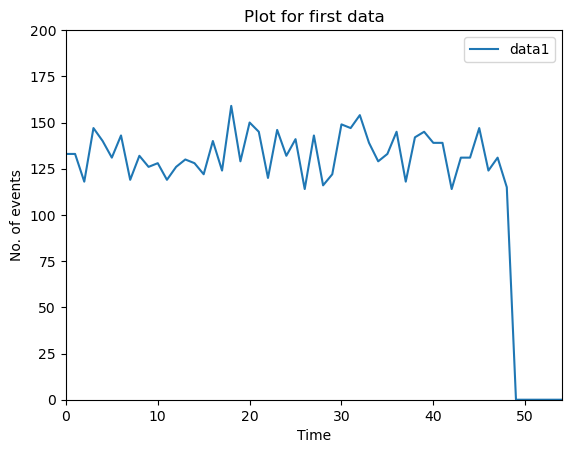

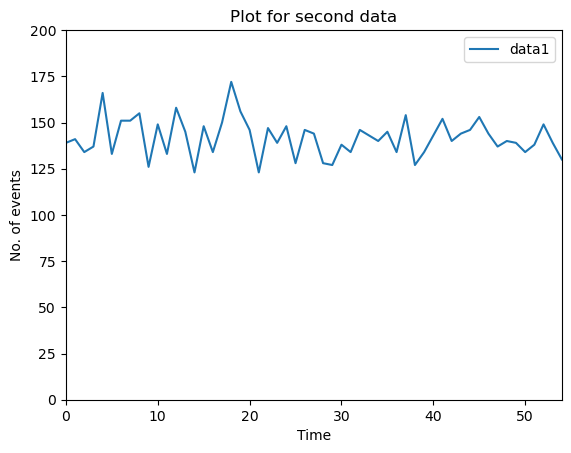

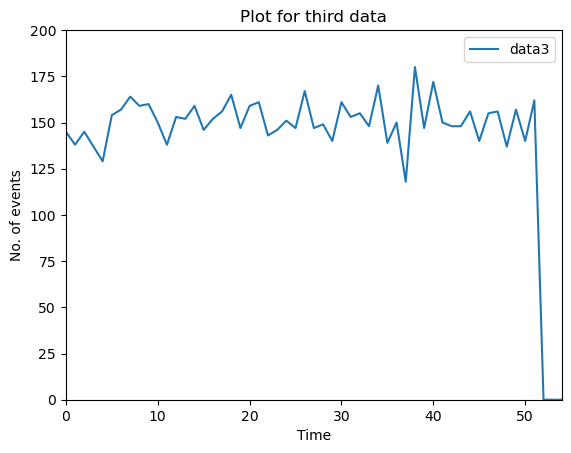

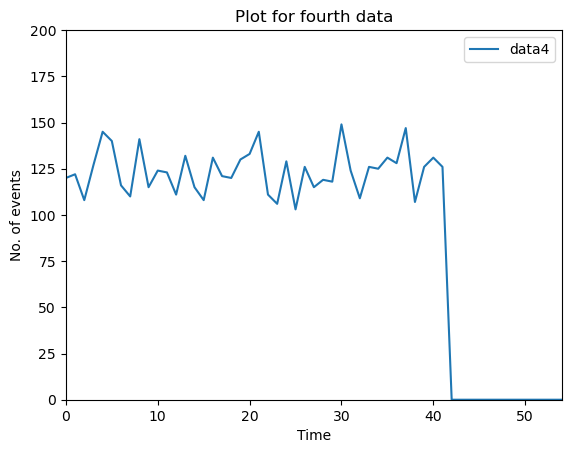

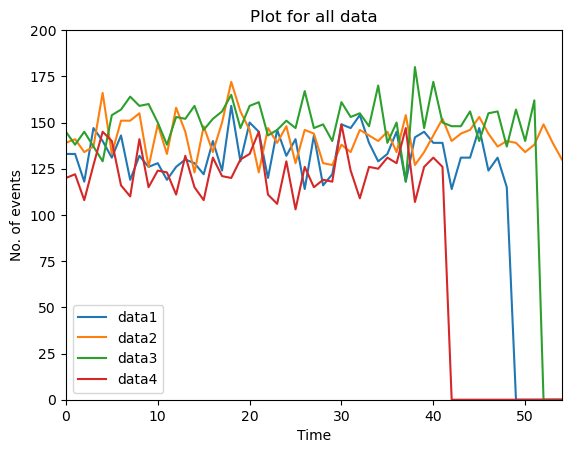

In [2]:
time = np.arange(55)
pltdata = [np.zeros(55),np.zeros(55),np.zeros(55),np.zeros(55)]
for i in range(4):
    for j in data[i]:
        pltdata[i][int(j)] = pltdata[i][int(j)] + 1

plt.title('Plot for first data')
plt.xlim([0,54])
plt.ylim([0,200])
plt.xlabel('Time')
plt.ylabel('No. of events')
plt.plot(time,pltdata[0],label='data1')
plt.legend()
plt.show()

plt.title('Plot for second data')
plt.xlim([0,54])
plt.ylim([0,200])
plt.xlabel('Time')
plt.ylabel('No. of events')
plt.plot(time,pltdata[1],label='data1')
plt.legend()
plt.show()

plt.title('Plot for third data')
plt.xlim([0,54])
plt.ylim([0,200])
plt.xlabel('Time')
plt.ylabel('No. of events')
plt.plot(time,pltdata[2],label='data3')
plt.legend()
plt.show()

plt.title('Plot for fourth data')
plt.xlim([0,54])
plt.ylim([0,200])
plt.xlabel('Time')
plt.ylabel('No. of events')
plt.plot(time,pltdata[3],label='data4')
plt.legend()
plt.show()

plt.title('Plot for all data')
plt.xlim([0,54])
plt.ylim([0,200])
plt.xlabel('Time')
plt.ylabel('No. of events')
plt.plot(time,pltdata[0],label='data1')
plt.plot(time,pltdata[1],label='data2')
plt.plot(time,pltdata[2],label='data3')
plt.plot(time,pltdata[3],label='data4')
plt.legend()
plt.show()
    

Give your insights on what you observe in the various plots. Regarding frequency of events in various files as well as the total duration each file is covering.

In [3]:
# Events in the files occur till the following times and the following average frequency.
print(int(max(data[0])),len(data[0])/max(data[0]))
print(int(max(data[1])),len(data[1])/max(data[1]))
print(int(max(data[2])),len(data[2])/max(data[2]))
print(int(max(data[3])),len(data[3])/max(data[3]))

48 133.24097125717987
54 141.8395425470408
51 151.14864735925954
41 123.66261056396755


In [4]:
# Events in file 4 end the fastest while in file 2 continue for the longest.
# In file 3 events happen with the highest frequency while they happen with the lowest fequency in file 4

Now for the final part of this question. We can see that the event frequency varies with time. Count how many bins are there, where atleast 2 of the files have more than 140 events in that bin, simultaneously.

In [5]:
cnt = 0
for i in range(55):
    temp = 0
    for j in range(4):
        if pltdata[j][i] > 140 :
            temp = temp + 1
    if temp > 1 :
        cnt = cnt + 1
print(cnt)

33


## Bonus

Let us do this more generally Generate a table with the threshold along one axis and the number of files along the other axis. Fill the table with counts of bins where atleast num_files have more than threshold events in that bin. In the previous part, num_files was 2 and num_bins was 140. Do this for num_files in [1,2,3,4]. num_bins in [130,135,140,145,150,155,160]. Print the table.

In [6]:
temp = [[0]*4] * 55
for i in range(55):
    temporary = list([pltdata[0][i],pltdata[1][i],pltdata[2][i],pltdata[3][i]])
    temp[i] = sorted(temporary)

num_files = [1,2,3,4]
num_bins = [130,135,140,145,150,155,160]

table = np.zeros((len(num_files),len(num_bins)),dtype="int32")

for i in range(0,len(num_bins)):
    for j in range(0,55):
        x = 4
        if num_bins[i] >= temp[j][0]:
            x = x-1
        if num_bins[i] >= temp[j][1]:
            x = x-1
        if num_bins[i] >= temp[j][2]:
            x = x-1
        if num_bins[i] >= temp[j][3]:
            x = x-1
        for k in range(len(num_files)):
            if x >= num_files[k]:
                table[k][i] = table[k][i] + 1

df = pd.DataFrame(table,index=num_files,columns=num_bins)
print(df)

   130  135  140  145  150  155  160
1   54   54   49   45   31   21   10
2   48   45   33   20    6    1    1
3   28   15    8    4    1    1    0
4    7    1    0    0    0    0    0
